In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import make_classification
X,y = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)

In [ ]:
pd.DataFrame(X).head()

,0,1
0,1.863411,0.087646
1,-1.530997,1.901182
2,-0.017224,-2.591112
3,-2.032039,-1.801162
4,4.620555,0.901124


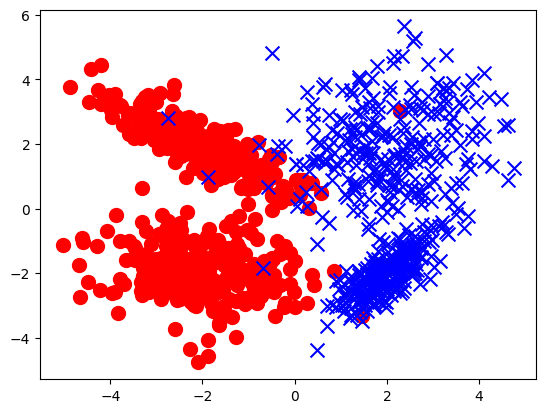

In [ ]:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)
plt.show()

In [ ]:
class SGD():
    def __init__(self, alpha=0.5, n_iters=1000):
        self.b = None
        self._alpha = alpha
        self._n_iters = n_iters
    def gradient_step(self, b, b_grad):
        return b - self._alpha * b_grad
    def optimize(self, X, y, start_b, n_iters):
        b = start_b.copy()
        for i in range(n_iters):
            b_grad = self.grad_func(X, y, b)
            b = self.gradient_step(b, b_grad)
        return b
    def fit(self, X, y):
        m = X.shape[1]
        start_b = np.ones(m)
        self.b = self.optimize(X, y, start_b, self._n_iters)


In [ ]:
class LogReg(SGD):
    def sigmoid(self, X, b):
        return 1. / (1. + np.exp(-X.dot(b)))
    def grad_func(self, X, y, b):
        n = X.shape[0]
        grad = 1. / n * X.transpose().dot(self.sigmoid(X, b) - y)
        return grad
    def predict_proba(self, X):
        return self.sigmoid(X, self.b)
    def predict(self, X):
        y_pred = self.predict_proba(X) > 0.5
        return y_pred
logreg = LogReg()
X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
logreg.fit(X, y)
y_pred = logreg.predict(X)

from sklearn.metrics import accuracy_score, f1_score
ac = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
print(f'accuracy = {ac:.2f} F1-score = {f1:.2f}')
y_pred_proba = logreg.predict_proba(X)
xx, yy = np.meshgrid(
    np.arange(X.min(axis=0)[1]-1, X.max(axis=0)[1]+1, 0.01),
    np.arange(X.min(axis=0)[2]-1, X.max(axis=0)[2]+1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
XX = np.array([(1, *xx) for xx in XX])

Z = logreg.predict_proba(XX)
Z = Z.reshape(xx.shape)

accuracy = 0.98 F1-score = 0.98


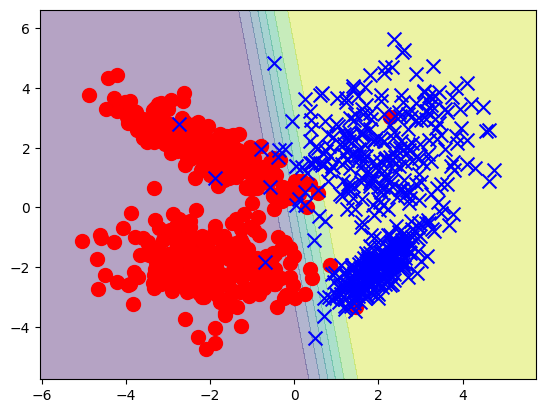

In [ ]:
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 1][y==0], X[:, 2][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 1][y==1], X[:, 2][y==1], marker="x", c='b', s=100)

1. Выведите результаты работы библиотечной модели - в численном и в графическом виде.

 ...]

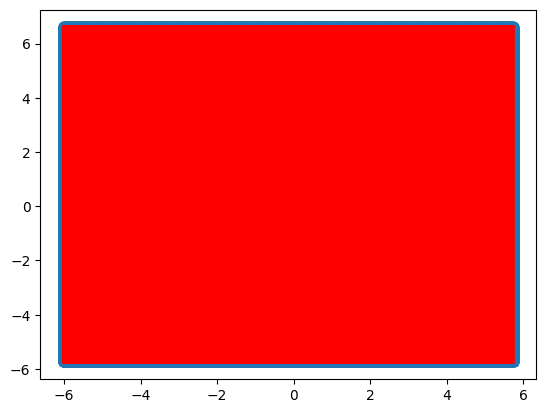

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X, y)
y_pred_lr = model.predict(X)
plt.scatter(xx, yy)
plt.plot(xx, yy, c='r')

1. Выведите результаты работы библиотечной модели - в численном и в графическом виде.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


X,y = make_classification (n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_classes=2, class_sep=2, random_state=1)

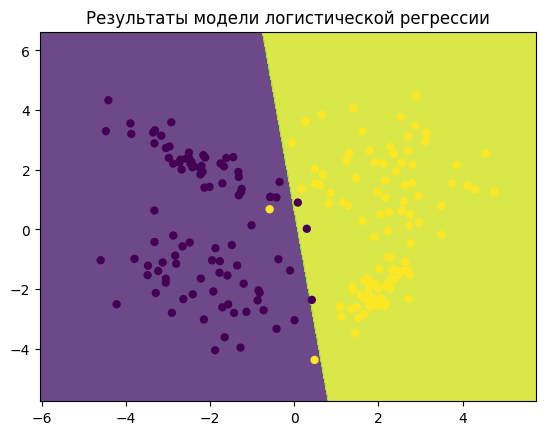

Точность модели: 0.97
Матрица ошибок:
[[ 92   3]
 [  2 103]]


In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
xx, yy = np.meshgrid(np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, 0.01),
                     np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='o', s=25)
plt.title('Результаты модели логистической регрессии')
plt.show()
print(f'Точность модели: {accuracy:.2f}')
print('Матрица ошибок:')
print(confusion)

2. Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.

Скорость обучения 0.01: Точность модели = 0.97
Скорость обучения 0.1: Точность модели = 0.97
Скорость обучения 0.5: Точность модели = 0.97
Скорость обучения 1: Точность модели = 0.97
Скорость обучения 2: Точность модели = 0.97
Скорость обучения 5: Точность модели = 0.97
Скорость обучения 10: Точность модели = 0.98


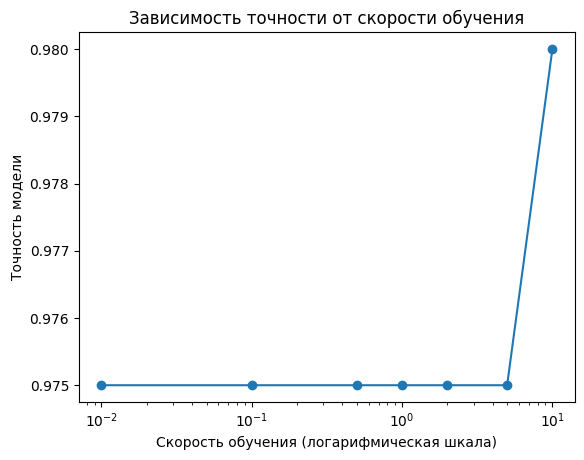

In [3]:
learning_rates = [0.01, 0.1, 0.5, 1, 2, 5, 10]

results = {}

for lr in learning_rates:
    model = LogisticRegression(solver='sag', max_iter=10000, C=1/lr)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[lr] = accuracy

for lr, accuracy in results.items():
    print(f'Скорость обучения {lr}: Точность модели = {accuracy:.2f}')

plt.figure()
plt.plot(learning_rates, [results[lr] for lr in learning_rates], marker='o')
plt.xscale('log')
plt.xlabel('Скорость обучения (логарифмическая шкала)')
plt.ylabel('Точность модели')
plt.title('Зависимость точности от скорости обучения')
plt.show()

3. Модифицируйте код модели таким образом, чтобы фиктивный столбец единиц добавлялся к матрице признаков внутри класса.

In [ ]:
X = np.hstack((np.ones((X.shape[0], 1)), X))

4. Поэкспериментируйте с разными значениями параметра class_sep при генерации датасета. Визуализируйте полученные распределения. Сделайте вывод о том, как этот параметр влияет на точность получаемых моделей.

Точность модели: 0.85
Матрица ошибок: [[80 15]
 [14 91]]


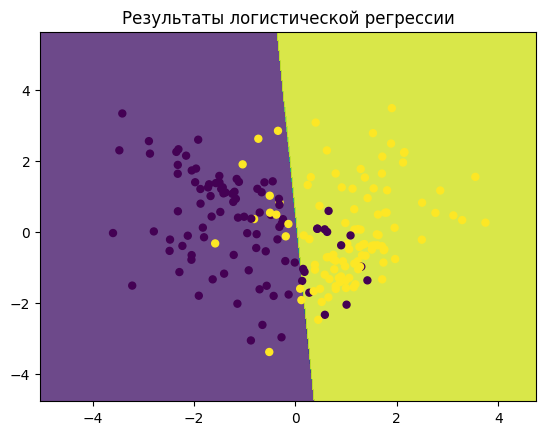

Точность модели: 0.97
Матрица ошибок: [[ 92   3]
 [  2 103]]


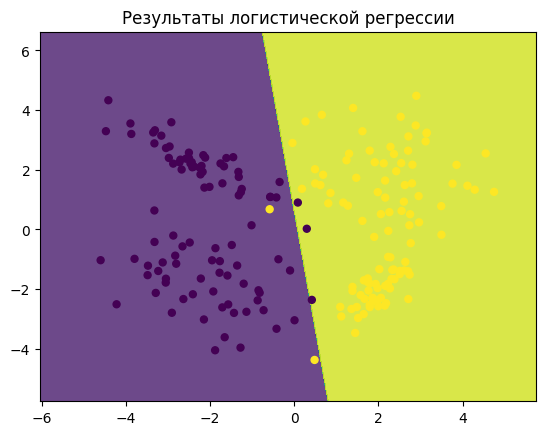

Точность модели: 1.00
Матрица ошибок: [[ 95   0]
 [  0 105]]


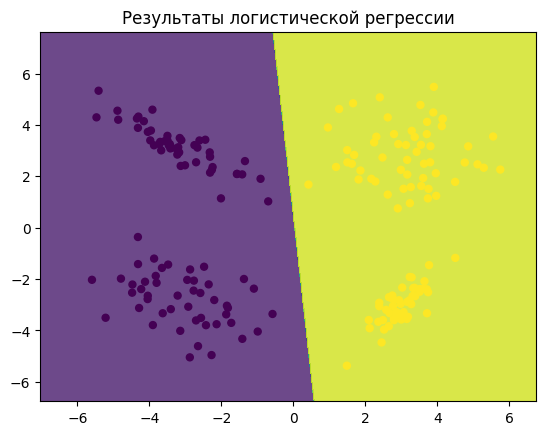

Точность модели: 1.00
Матрица ошибок: [[ 95   0]
 [  0 105]]


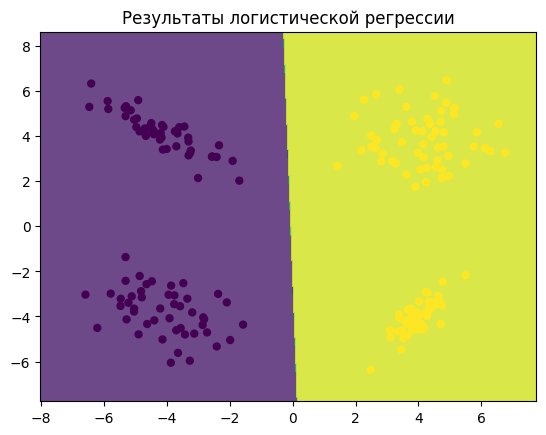

Точность модели: 1.00
Матрица ошибок: [[ 95   0]
 [  0 105]]


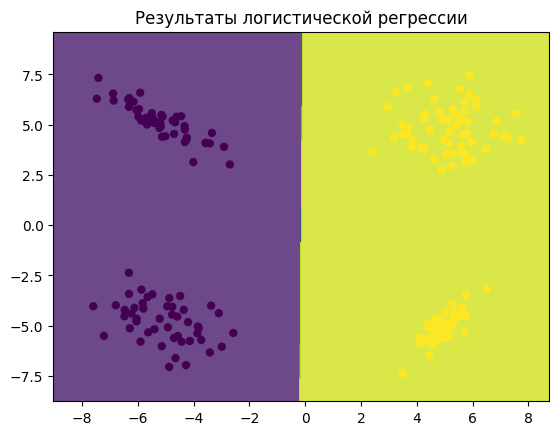

In [10]:
for c_s in range(1,6):
  X,y = make_classification (n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_classes=2, class_sep=c_s, random_state=1)

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  model = LogisticRegression()
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  confusion = confusion_matrix(y_test, y_pred)

  print(f'Точность модели: {accuracy:.2f}')
  print('Матрица ошибок:',  confusion)
  #print(confusion)

  xx, yy = np.meshgrid(np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, 0.01),
                      np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, 0.01))
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  plt.figure()
  plt.contourf(xx, yy, Z, alpha=0.8)
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='o', s=25)
  plt.title('Результаты логистической регрессии')
  plt.show()

5. Сгенерируйте датасет с большим числом признаков и примените к нему созданную модель.

In [11]:
class SGD():
    def __init__(self, alpha=0.5, n_iters=1000):
        self.b = None
        self._alpha = alpha
        self._n_iters = n_iters

    def gradient_step(self, b, b_grad):
        return b - self._alpha*b_grad

    def optimize(self, X, y, start_b, n_iters):
        b = start_b.copy()
        for i in range(n_iters):
            b_grad = self.grad_func(X, y, b)
            b = self.gradient_step(b, b_grad)
        return b

    def fit(self, X, y):
        m = X.shape[1]
        start_b = np.ones(m)
        self.b = self.optimize(X, y, start_b, self._n_iters)


class LogReg(SGD):
    def sigmoid(self, X, b):
        return 1. / (1. + np.exp(-X.dot(b)))

    def grad_func(self, X, y, b):
        n = X.shape[0]
        grad = 1. / n * np.dot(X.T, self.sigmoid(X, b) - y)
        return grad

    def predict_proba(self, X):
        return self.sigmoid(X, self.b)

    def predict(self, X):
        y_pred = self.predict_proba(X) > 0.5
        return y_pred
logreg = LogReg()

X, y = make_classification(n_samples=1000, n_features=100, n_informative=100, n_redundant=0, n_classes=2, class_sep=2, random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogReg()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели: {accuracy:.2f}')


Точность модели: 0.93


6. Сгенерируйте датасет с большим количеством классов и реализуйте в классе алгоритм "один против всех". Решите задачу множественной классификации средствами sklearn.

In [12]:
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=5, random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = []
for class_label in range(5):
    model = LogisticRegression(solver='lbfgs')
    binary_labels = (y_train == class_label).astype(int)
    model.fit(X_train, binary_labels)
    models.append(model)

y_pred = np.array([model.predict(X_test) for model in models]).T
predicted_classes = np.argmax(y_pred, axis=1)

accuracy = np.mean(predicted_classes == y_test)
print(f'Точность модели: {accuracy:.2f}')

Точность модели: 0.34


7. Выведите значения вероятностей для каждого объекта принадлежать тому или иному классу для библиотечной модели LogisticRegression.

In [13]:
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=5, random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(solver='lbfgs', multi_class='ovr')

model.fit(X_train, y_train)

y_probabilities = model.predict_proba(X_test)
print("Вероятности для первых пяти объектов:")
print(y_probabilities[:5])


Вероятности для первых пяти объектов:
[[0.10724327 0.26902639 0.08405435 0.52228846 0.01738754]
 [0.17344199 0.22280374 0.01098868 0.10890257 0.48386302]
 [0.02359144 0.07733586 0.04046081 0.15265741 0.70595448]
 [0.04650396 0.08524237 0.06601089 0.21388366 0.58835911]
 [0.11402733 0.58865305 0.00743634 0.19943763 0.09044565]]
